In [1]:
import pandas 
import numpy as np
labels = pandas.read_csv('hasy-data-labels.csv')
include = np.arange(70, 80, 1)
y = labels.loc[labels['symbol_id'].isin(include)]
y.shape

(1020, 4)

In [1]:
from scipy.misc import imread
samples = []
for filename in y["path"]:
    img = imread(filename, mode='L').reshape(-1)
    samples.append(img)
X = pandas.DataFrame.from_records(samples).as_matrix()
print(X.shape, y.shape)

NameError: name 'y' is not defined

In [6]:
#split and shuffle data into train and test
from sklearn.utils import shuffle
X, y = shuffle(X, y)
X_train = X[:int(X.shape[0] * 0.8), :]
y_train = y["symbol_id"].as_matrix()[:int(y.shape[0] * 0.8)]
X_test = X[int(X.shape[0] * 0.8):, :]
y_test = y["symbol_id"].as_matrix()[int(y.shape[0] * 0.8):]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(816, 1024) (816,) (204, 1024) (204,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(accuracy_score(y_test, lr.predict(X_test)))

0.843137254902


In [9]:
# Naive classifier
from scipy import stats
def naive_classify(y_train, X_test):
    most_common = int(stats.mode(y_train).mode[0])
    return np.ones(X_test.shape[0]) * most_common
print(accuracy_score(y_test, naive_classify(y_train, X_test)))

0.122549019608


0.754901960784


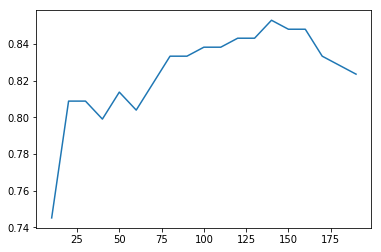

In [12]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(accuracy_score(y_test, rf.predict(X_test)))
accs = []
trees = np.arange(10, 200, 10)
for i in trees:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)

    acc = accuracy_score(y_test, rf.predict(X_test))
    accs.append(acc)
plt.plot(trees, accs)
plt.show()

In [15]:
#reshuffle data into test, validation and train
from sklearn.utils import shuffle
X, y = shuffle(X, y)
train_part = int(X.shape[0] * 0.8)
val_part = int(X.shape[0] * 0.1)
X_train = X[:train_part, :]
y_train = y["symbol_id"].as_matrix()[:train_part]
X_val = X[train_part: train_part + val_part, :]
y_val = y["symbol_id"].as_matrix()[train_part: train_part + val_part:]
X_test = X[train_part + val_part:, :]
y_test = y["symbol_id"].as_matrix()[train_part + val_part:]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
sizes = np.arange(100, 1000, 100)
val_accs = np.zeros(len(sizes))
classifiers = []
for idx, size in enumerate(sizes):
    rf = RandomForestClassifier(n_estimators=size)
    rf.fit(X_train, y_train)

    acc = accuracy_score(y_val, rf.predict(X_val))
    val_accs[idx] = acc
    classifiers.append(rf)
print("best val acc", sizes[np.argmax(val_accs)])
best = classifiers[np.argmax(val_accs)]
print(accuracy_score(y_test, best.predict(X_test)))

(816, 1024) (816,) (102, 1024) (102,) (102, 1024) (102,)
best val acc 800
0.892156862745


In [17]:
#TPOT
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=3, population_size=3, verbosity=2, max_eval_time_mins=1)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:  50%|█████     | 6/12 [01:41<01:23, 13.96s/pipeline]

Generation 1 - Current best internal CV score: 0.7668451438516171


Optimization Progress:  75%|███████▌  | 9/12 [02:20<00:36, 12.04s/pipeline]

Generation 2 - Current best internal CV score: 0.7669242004381214


Generation 3 - Current best internal CV score: 0.7977933496750251

Best pipeline: RandomForestClassifier(ZeroCount(input_matrix), bootstrap=True, criterion=entropy, max_features=0.1, min_samples_leaf=1, min_samples_split=13, n_estimators=100)
0.823529411765
